# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

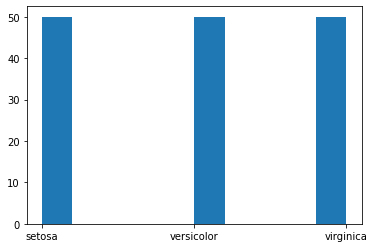

In [4]:
plt.hist(data.Species)
plt.show()

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
import numpy as np

In [8]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

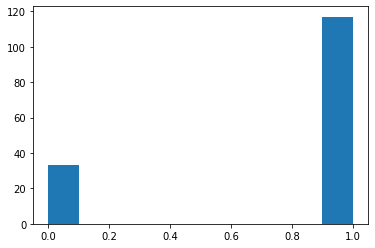

In [9]:
plt.hist(data["is_train"].astype(np.int32))
plt.show()

In [10]:
train, test = data[data["is_train"] == True], data[data["is_train"] == False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,4,1
virginica,0,1,13


## Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [17]:
import os
from graphviz import Source

In [18]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.577\\nsamples = 117\\nvalue = [36, 45, 36]"] ;\n1 [label="entropy = 0.0\\nsamples = 36\\nvalue = [36, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 4.75\\nentropy = 0.991\\nsamples = 81\\nvalue = [0, 45, 36]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 40\\nvalue = [0, 40, 0]"] ;\n2 -> 3 ;\n4 [label="Petal.Length <= 5.15\\nentropy = 0.535\\nsamples = 41\\nvalue = [0, 5, 36]"] ;\n2 -> 4 ;\n5 [label="entropy = 0.94\\nsamples = 14\\nvalue = [0, 5, 9]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 27\\nvalue = [0, 0, 27]"] ;\n4 -> 6 ;\n}'

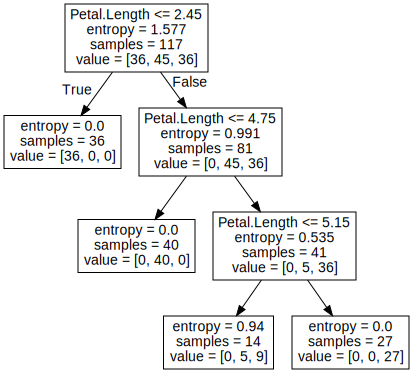

In [21]:
Source(text)